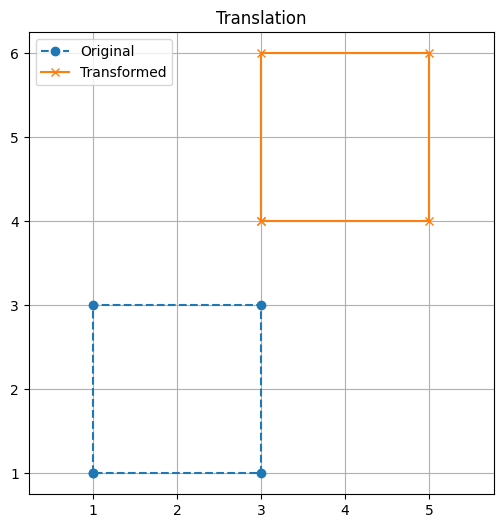

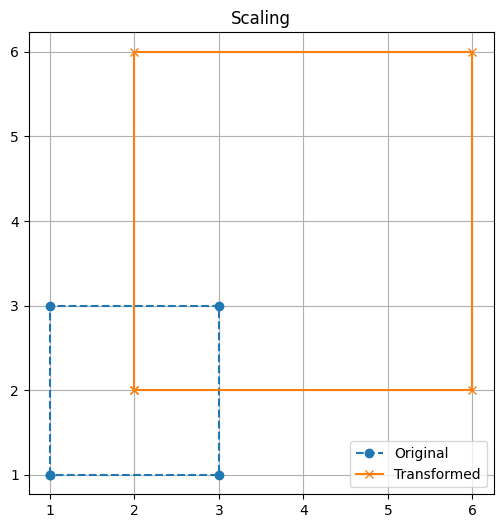

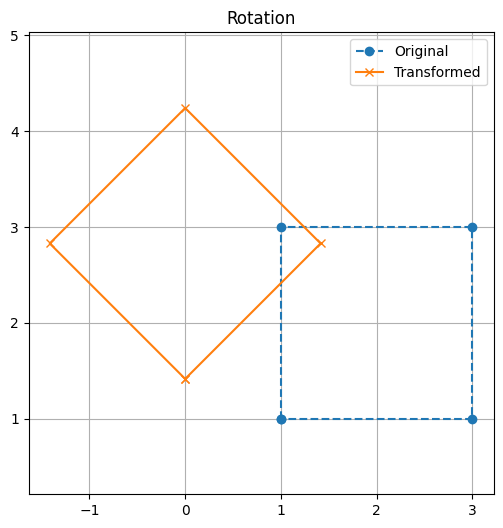

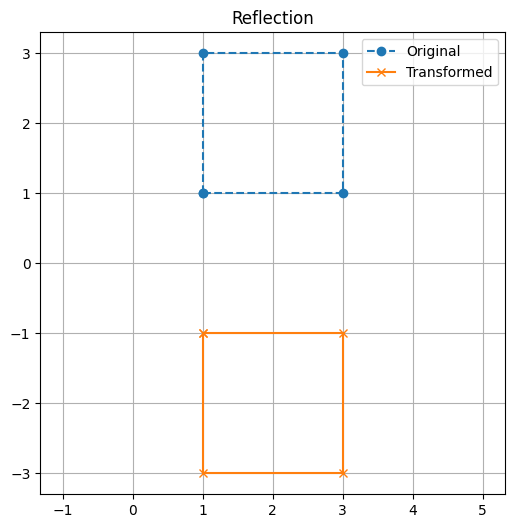

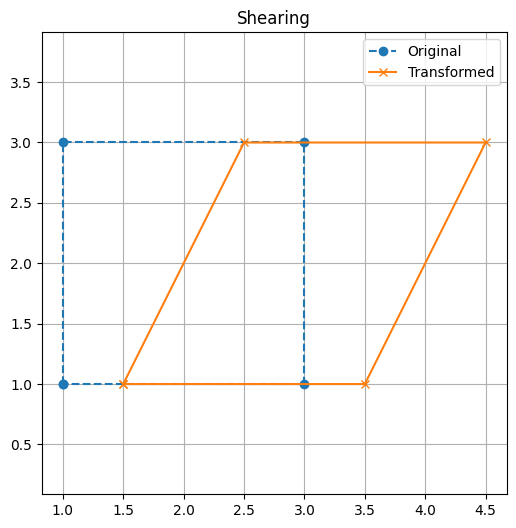

In [3]:
import numpy as np
import matplotlib.pyplot as plt

object_points = np.array([
    [1, 1],
    [1, 3],
    [3, 3],
    [3, 1],
    [1, 1]
])

def translate(points, tx, ty):
    transformation_matrix = np.array([[1, 0, tx], [0, 1, ty], [0, 0, 1]])
    homogenous_points = np.hstack((points, np.ones((points.shape[0], 1))))
    return (transformation_matrix @ homogenous_points.T).T[:, :2]

def scale(points, sx, sy):
    transformation_matrix = np.array([[sx, 0, 0], [0, sy, 0], [0, 0, 1]])
    homogenous_points = np.hstack((points, np.ones((points.shape[0], 1))))
    return (transformation_matrix @ homogenous_points.T).T[:, :2]

def rotate(points, angle):
    rad = np.radians(angle)
    transformation_matrix = np.array([[np.cos(rad), -np.sin(rad), 0],
                                       [np.sin(rad), np.cos(rad), 0],
                                       [0, 0, 1]])
    homogenous_points = np.hstack((points, np.ones((points.shape[0], 1))))
    return (transformation_matrix @ homogenous_points.T).T[:, :2]

def reflect_x(points):
    transformation_matrix = np.array([[1, 0, 0], [0, -1, 0], [0, 0, 1]])
    homogenous_points = np.hstack((points, np.ones((points.shape[0], 1))))
    return (transformation_matrix @ homogenous_points.T).T[:, :2]

def shear_x(points, shx):
    transformation_matrix = np.array([[1, shx, 0], [0, 1, 0], [0, 0, 1]])
    homogenous_points = np.hstack((points, np.ones((points.shape[0], 1))))
    return (transformation_matrix @ homogenous_points.T).T[:, :2]

def composite_transformation(points, tx, ty, angle, sx, sy):
    points = translate(points, tx, ty)
    points = rotate(points, angle)
    points = scale(points, sx, sy)
    return points

def plot_shapes(original, transformed, title):
    plt.figure(figsize=(6, 6))
    plt.plot(original[:, 0], original[:, 1], label='Original', linestyle='--', marker='o')
    plt.plot(transformed[:, 0], transformed[:, 1], label='Transformed', linestyle='-', marker='x')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.axis('equal')
    plt.show()

translated = translate(object_points, 2, 3)
scaled = scale(object_points, 2, 2)
rotated = rotate(object_points, 45)
reflected = reflect_x(object_points)
sheared = shear_x(object_points, 0.5)

plot_shapes(object_points, translated, "Translation")
plot_shapes(object_points, scaled, "Scaling")
plot_shapes(object_points, rotated, "Rotation")
plot_shapes(object_points, reflected, "Reflection")
plot_shapes(object_points, sheared, "Shearing")


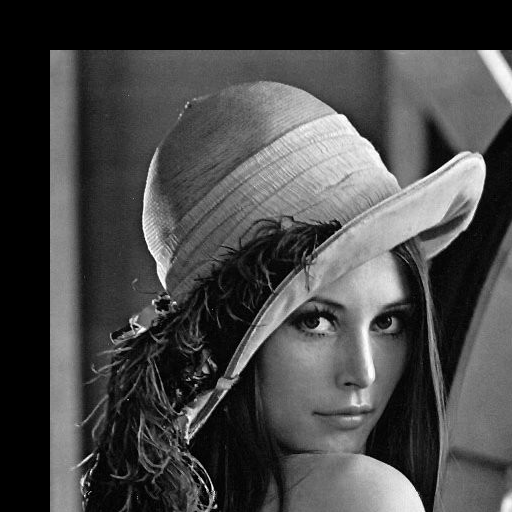

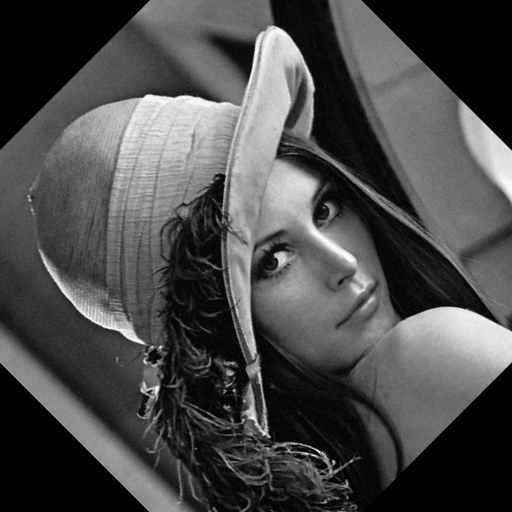

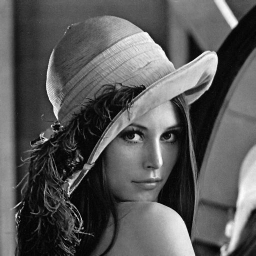

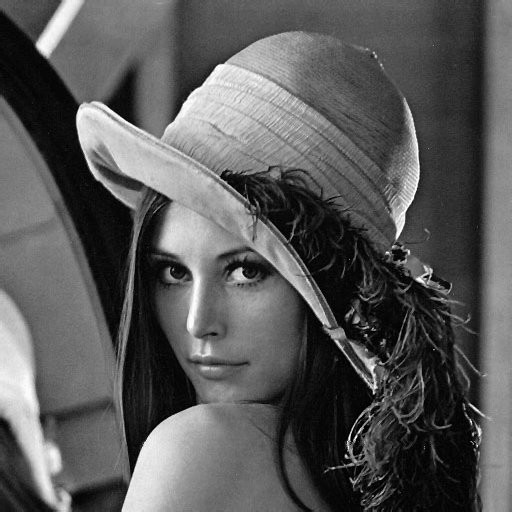

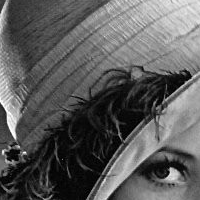

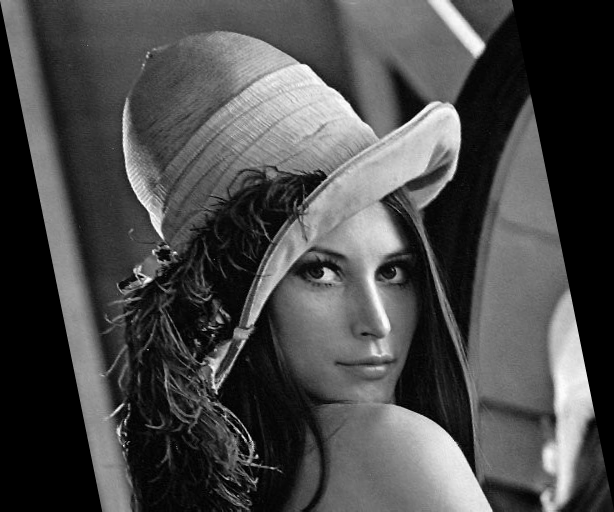

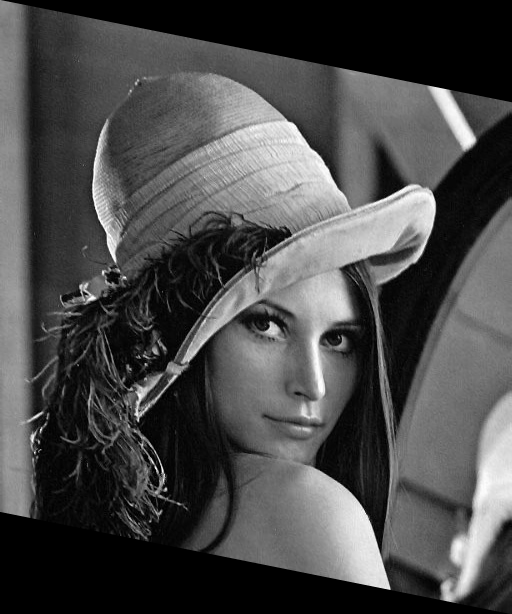

In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread('/content/ACV1.jpg')
(h, w) = image.shape[:2]

def translate(image, tx, ty):
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(image, M, (w, h))

def rotate(image, angle):
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, M, (w, h))

def scale(image, sx, sy):
    return cv2.resize(image, None, fx=sx, fy=sy, interpolation=cv2.INTER_LINEAR)

def reflect(image, mode=1):
    return cv2.flip(image, mode)

def crop(image, x, y, w, h):
    return image[y:y+h, x:x+w]

def shear_x(image, shx):
    M = np.float32([[1, shx, 0], [0, 1, 0]])
    return cv2.warpAffine(image, M, (w + int(h * shx), h))

def shear_y(image, shy):
    M = np.float32([[1, 0, 0], [shy, 1, 0]])
    return cv2.warpAffine(image, M, (w, h + int(w * shy)))

translated = translate(image, 50, 50)
rotated = rotate(image, 45)
scaled = scale(image, 0.5, 0.5)
reflected = reflect(image)
cropped = crop(image, 100, 100, 200, 200)
sheared_x = shear_x(image, 0.2)
sheared_y = shear_y(image, 0.2)

cv2_imshow(translated)
cv2_imshow(rotated)
cv2_imshow(scaled)
cv2_imshow(reflected)
cv2_imshow(cropped)
cv2_imshow(sheared_x)
cv2_imshow(sheared_y)
cv2.waitKey(0)
cv2.destroyAllWindows()
